In [1]:
import pandas as pd
import numpy as np
# The statistical module used to run chi square test
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

all_data = pd.read_csv('starting_data/hfi_cc_2018.csv',index_col="countries")

freedom_and_happiness = pd.read_csv('starting_data/happiness.csv',index_col="Country")

latest_year = all_data.loc[all_data['year'] == 2016]

df = latest_year.dropna(axis='columns')
df = df.merge(freedom_and_happiness, left_index=True, right_index=True, validate="one_to_one")
df = df.drop(columns=['year','ISO_code','region','ef_score','ef_rank','hf_quartile','pf_score','pf_rank','hf_rank','hf_score'])

labels = pd.read_csv('starting_data/labels.csv',index_col="index")

df

,pf_rol,pf_ss_homicide,pf_ss_disappearances_violent,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss,pf_movement,pf_expression_killed,pf_expression_jailed,...,ef_regulation_credit_private,ef_regulation_credit,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,Happiness score
Albania,5.291752,8.920429,10.000000,10.000000,10.000000,10.000000,8.806810,6.666667,10.000000,10.000000,...,7.295687,7.098562,10.0,6.916278,6.000000,9.713864,7.074366,6.705863,6.906901,4.719
Algeria,3.819566,9.456254,9.294030,9.926119,9.990149,8.842060,8.043882,5.000000,10.000000,10.000000,...,5.301526,5.100509,1.0,5.029513,1.777778,9.243070,7.029528,5.676956,5.268992,5.211
Argentina,5.744791,7.622974,10.000000,10.000000,9.990877,9.498175,9.040383,10.000000,10.000000,10.000000,...,4.259461,5.419820,10.0,5.151405,6.666667,9.122357,6.508295,5.535831,5.369019,6.086
Armenia,5.003205,8.808750,10.000000,9.316196,9.931620,9.349563,8.830549,6.666667,10.000000,10.000000,...,7.306138,9.102046,0.0,6.234630,6.000000,9.846472,6.491481,6.797530,7.378069,4.559
Australia,7.776279,9.623538,10.000000,10.000000,9.991739,9.998348,9.873962,10.000000,10.000000,10.000000,...,8.729074,9.576358,10.0,7.698589,10.000000,9.912606,8.823021,8.121631,8.465526,7.228
Austria,8.171749,9.737912,10.000000,10.000000,10.000000,10.000000,9.912637,10.000000,10.000000,10.000000,...,9.387044,9.129015,3.0,5.565118,8.888889,9.233099,8.531578,7.419870,7.371334,7.246
Azerbaijan,4.270861,9.143499,5.183346,9.965839,9.979504,8.525738,8.667524,5.000000,10.000000,4.875900,...,8.403334,7.467778,1.0,6.076782,6.444444,9.837018,7.814181,7.080078,6.874880,5.208
Bahrain,5.900339,9.790481,10.000000,9.766110,9.719332,8.397088,8.006968,6.666667,10.000000,0.000000,...,2.827501,7.609167,10.0,6.619418,8.000000,9.675831,9.680534,8.018774,7.415786,6.199
Bangladesh,3.132892,8.998765,9.916130,9.844535,9.889538,7.930041,7.587380,5.000000,10.000000,9.877264,...,8.652251,7.884084,10.0,7.223647,2.666667,9.141428,5.123943,4.962580,6.690103,4.456
Belarus,5.128925,8.566135,10.000000,10.000000,10.000000,9.000000,9.188712,3.333333,10.000000,10.000000,...,4.551855,3.850618,1.0,7.188794,5.555556,9.833615,7.937484,8.092322,6.377245,5.323


In [19]:
pvals = pd.DataFrame(columns=["column","pvalue","statistic"])

pv = []
statistics = []
r = []
for col in df.columns:
    t = stats.ttest_ind(df[col], df['Happiness score'], equal_var=False)
    pv.append(t.pvalue)
    statistics.append(t.statistic)
    
pvals["column"] = df.columns
pvals["pvalue"] = pv
pvals["statistic"] = statistics
pvals["rs"] = r
pvals = pvals.set_index('column')
pvals = pvals.drop(index=['Happiness score'])

pvals = pvals.sort_values(by=['pvalue'])

critical_value = stats.chi2.ppf(q = 0.95, df = len(df) - 1)
pvals.head()

,pvalue,statistic,rs
column,,,
ef_legal_gender,3.377846e-88,-48.272532,0.954634
ef_regulation_business_start,6.693284e-86,29.874152,0.965762
ef_money_growth,9.325577e-65,22.878955,0.948043
pf_ss_disappearances_fatalities,1.813986e-62,23.229326,0.947300
pf_ss_disappearances_injuries,9.480367e-59,22.264014,0.939413


In [3]:
chis = pd.DataFrame(columns=["column","pvalue","statistic"])
a = []
b = []
c = []
for index,col in pvals.iterrows():
    x2 = stats.chisquare(df[index], df['Happiness score'])
    a.append(index)
    b.append(x2.pvalue)
    c.append(x2.statistic)
    
    
chis["column"] = a
chis["pvalue"] = b
chis["statistic"] = c

chis.set_index("column")

#significants = chis.where(chis["statistic"]>critical_value).dropna().set_index("column")
significants = chis.sort_values(by=['pvalue'])

In [25]:
rs = pd.DataFrame(columns=["column","pvalue","correlation","column label","rsquare"])
a = []
b = []
c = []
d = []
r = []
for index,col in pvals.iterrows():
    x2 = stats.spearmanr(df[index], df['Happiness score'])
    x3 = stats.kendalltau(df[index], df['Happiness score'])
    a.append(index)
    d.append(labels.loc[index]['name'])
    b.append(x2.pvalue)
    c.append(x2.correlation)
    
    model = sm.OLS(df[index], df['Happiness score']).fit()
    predictions = model.predict(df['Happiness score'])
    r.append(model.rsquared)
    
rs["column"] = a
rs["pvalue"] = b
rs["correlation"] = c
rs["column label"] = d
rs["rsquare"] = r
rs = rs.sort_values(by=['correlation'], ascending=False)
rs = rs.set_index("column")
rs

,pvalue,correlation,column label,rsquare
column,,,,
pf_rol,3.909141e-19,0.674790,Rule of law,0.956529
ef_regulation_business_bureaucracy,8.011259e-18,0.655803,Bureaucracy costs,0.872956
ef_trade,3.017934e-17,0.647011,Freedom to trade internationally,0.972545
ef_trade_regulatory,2.041721e-16,0.633812,Regulatory trade barriers,0.939017
ef_money,1.075067e-13,0.585567,Sound money,0.967986
ef_legal_military,1.107805e-13,0.585315,Military interference in rule of law and politics,0.903382
ef_legal,1.756324e-13,0.581422,Legal system and property rights,0.954371
ef_trade_regulatory_compliance,7.114241e-13,0.569279,Compliance costs of importing and exporting,0.858745
pf_ss,1.995757e-12,0.559996,Security and safety,0.967453


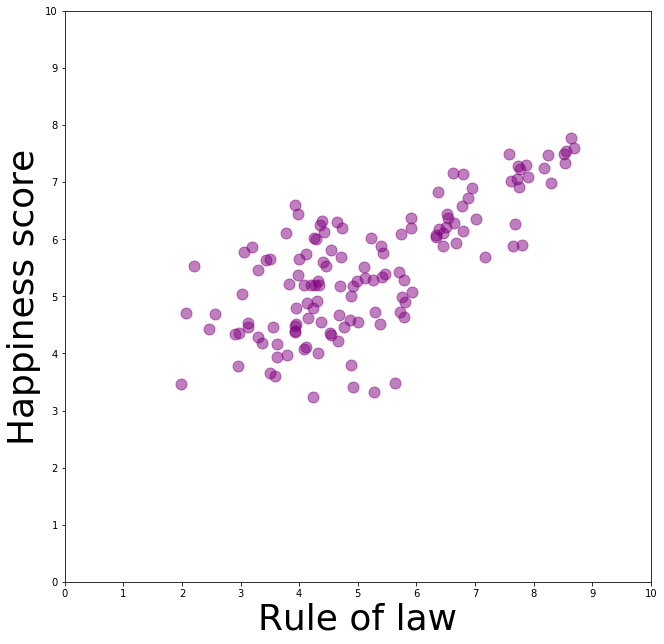

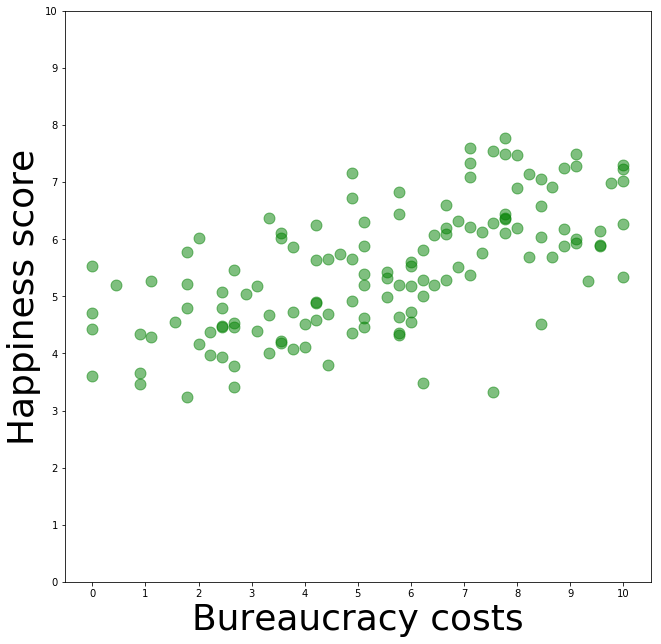

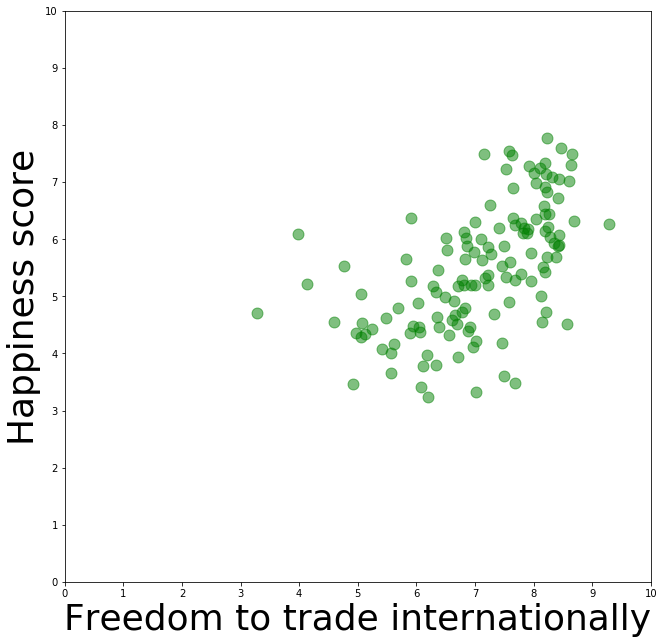

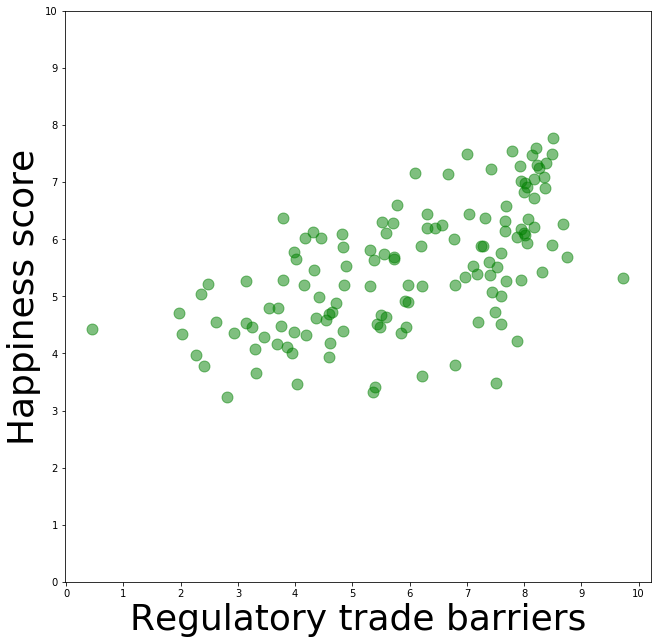

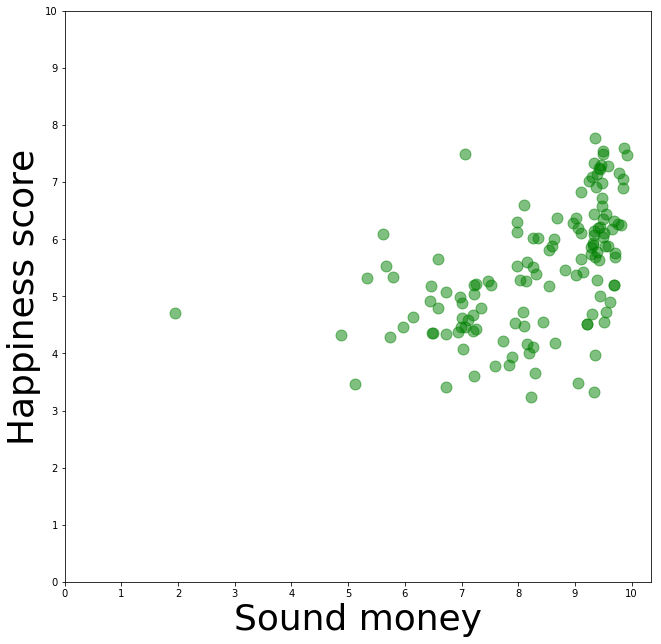

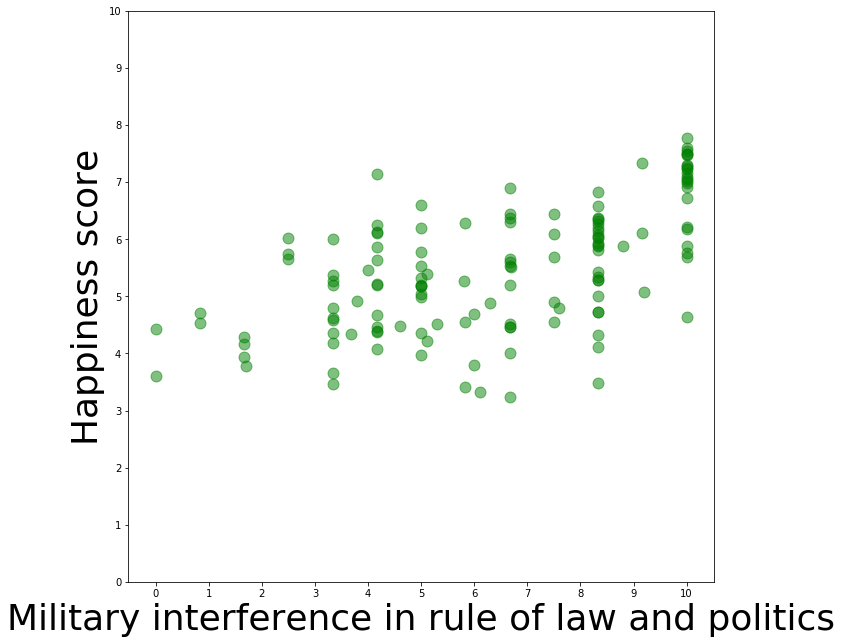

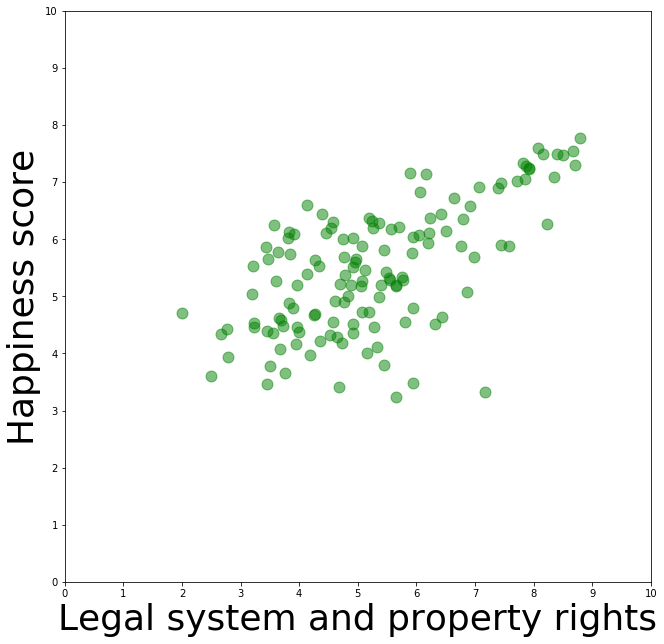

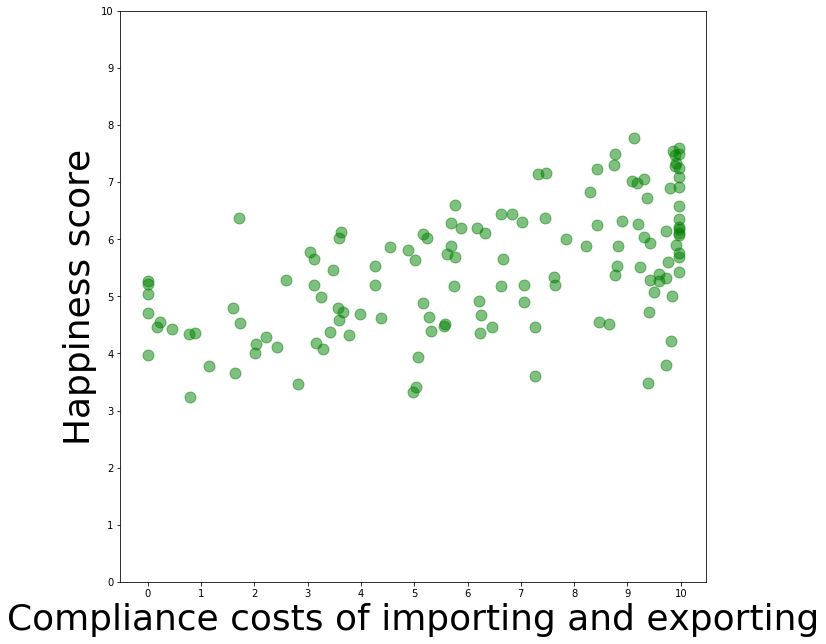

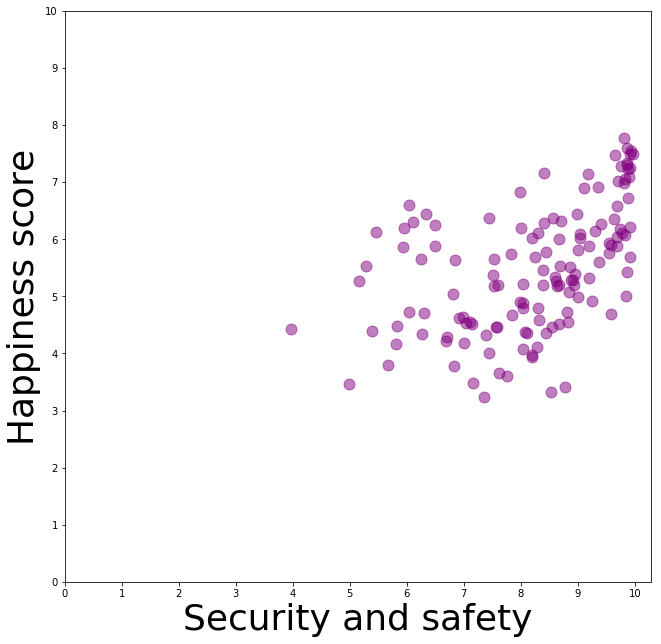

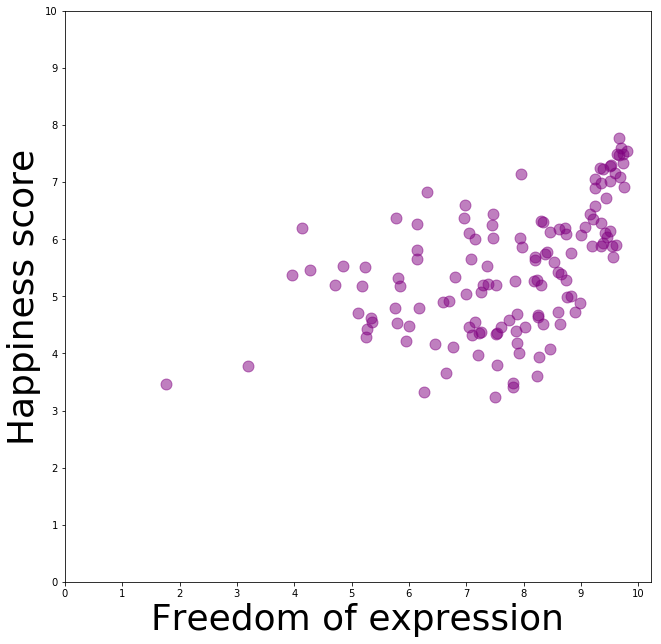

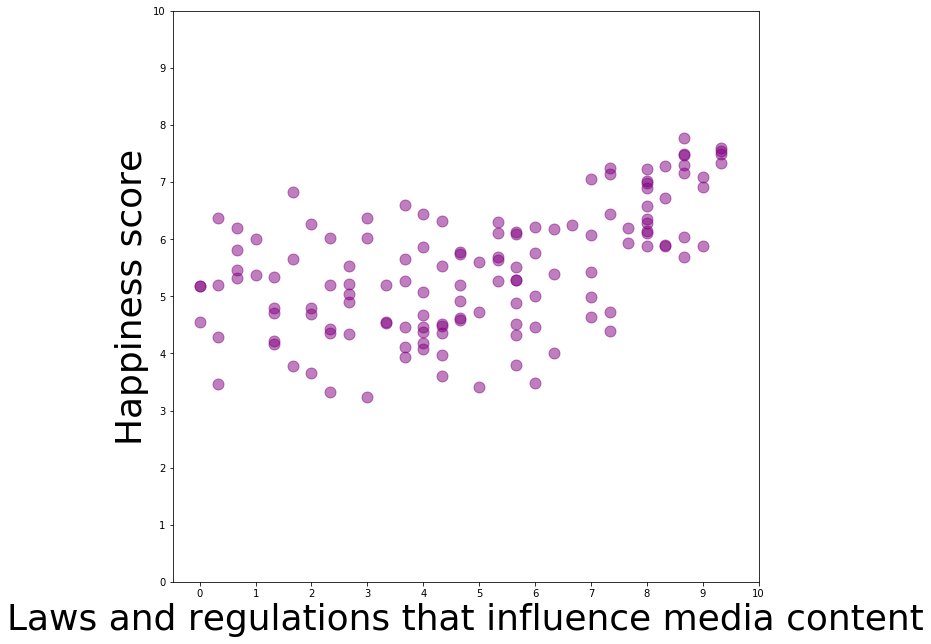

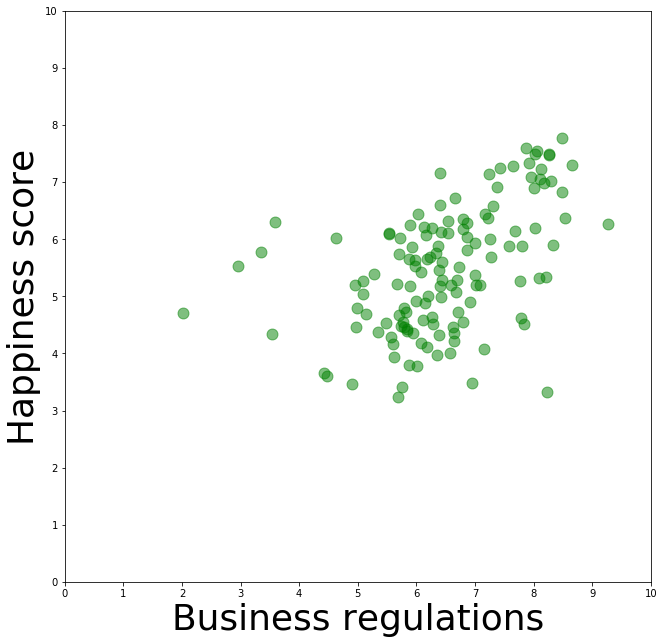

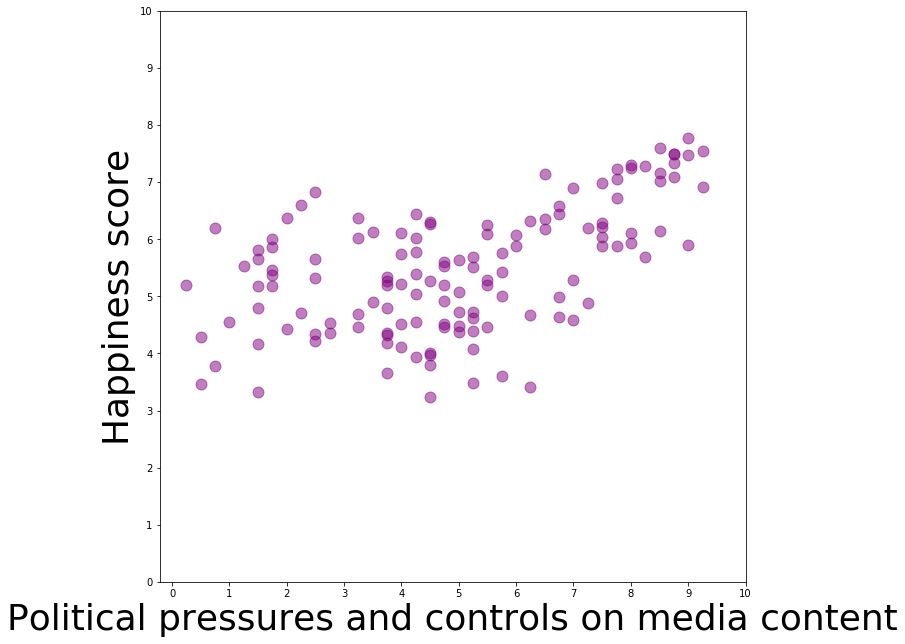

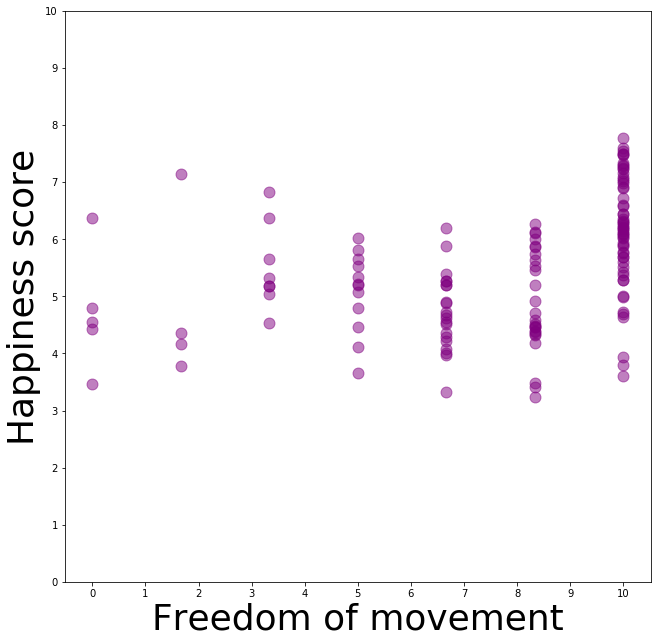

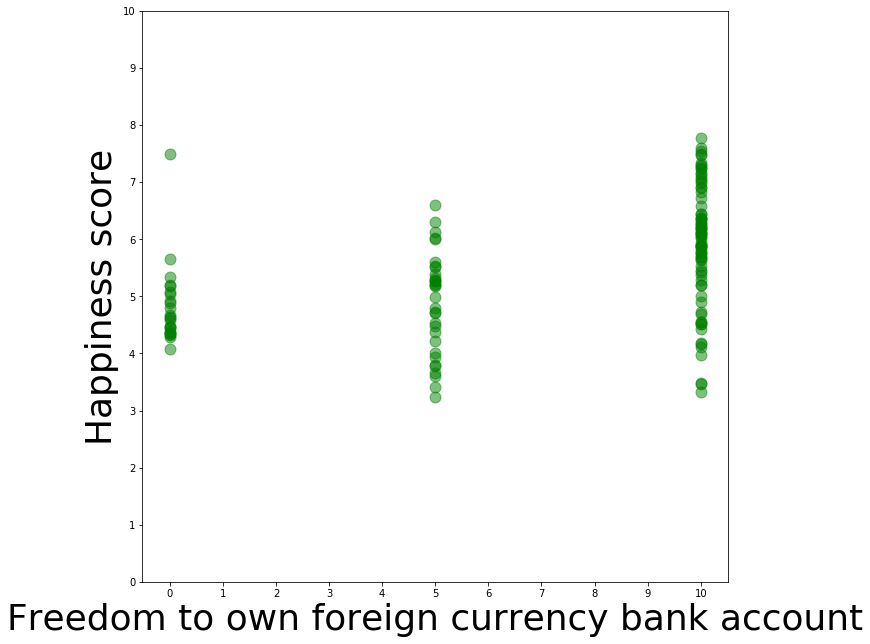

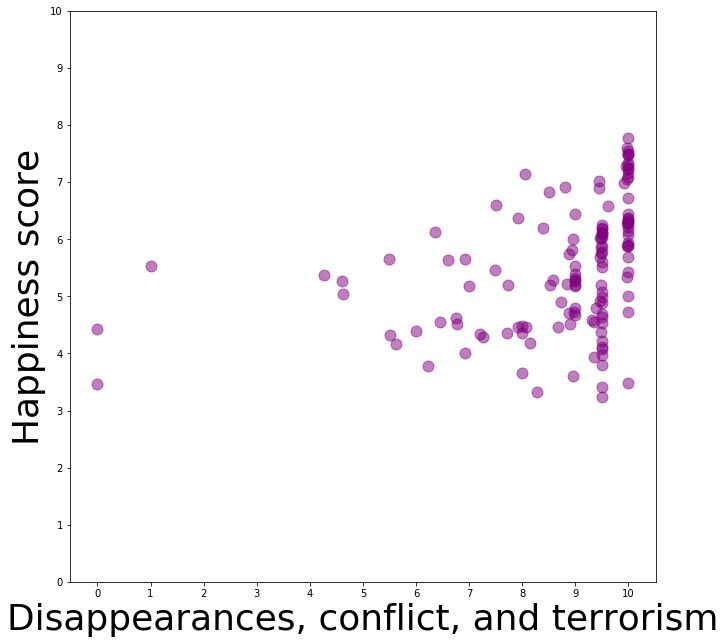

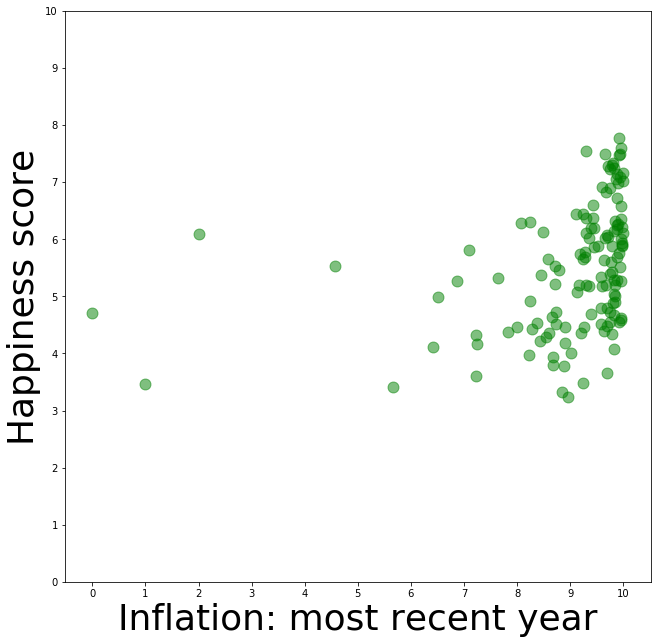

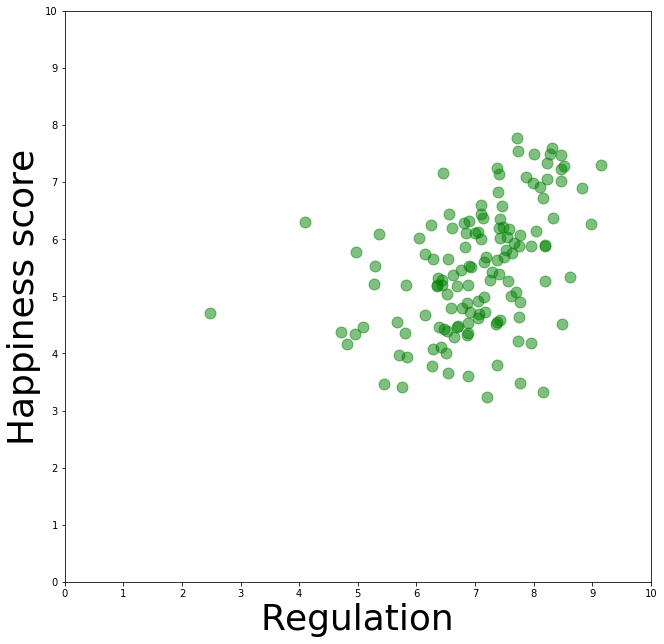

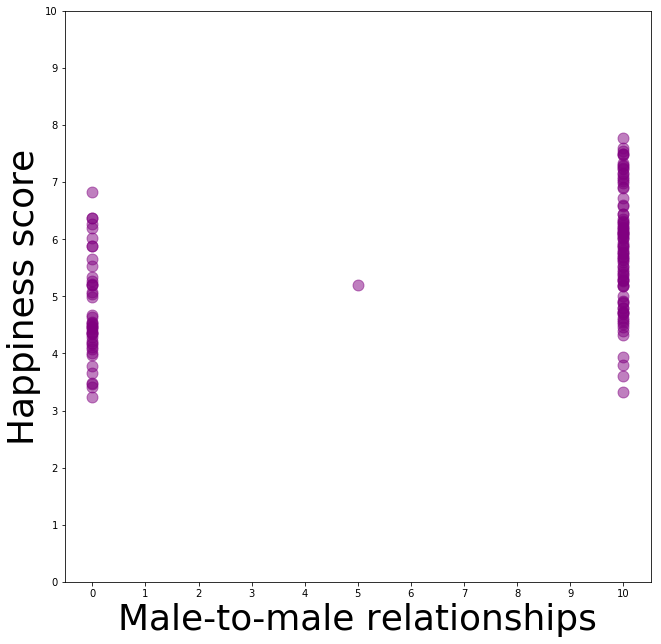

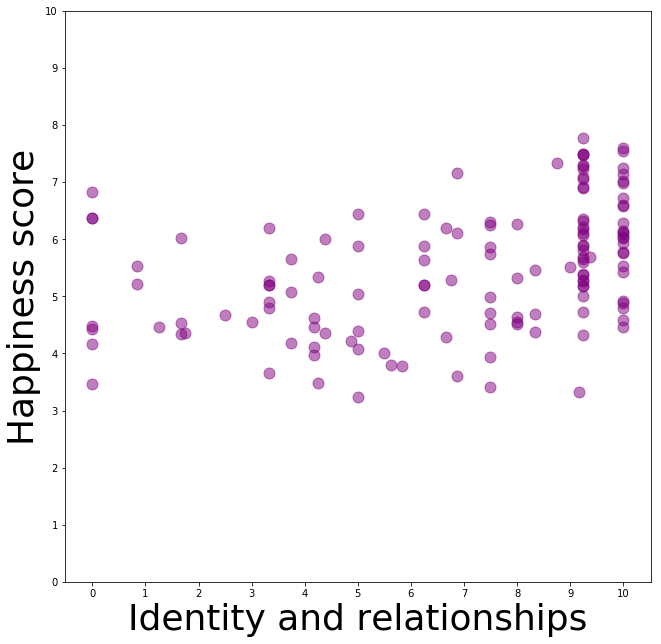

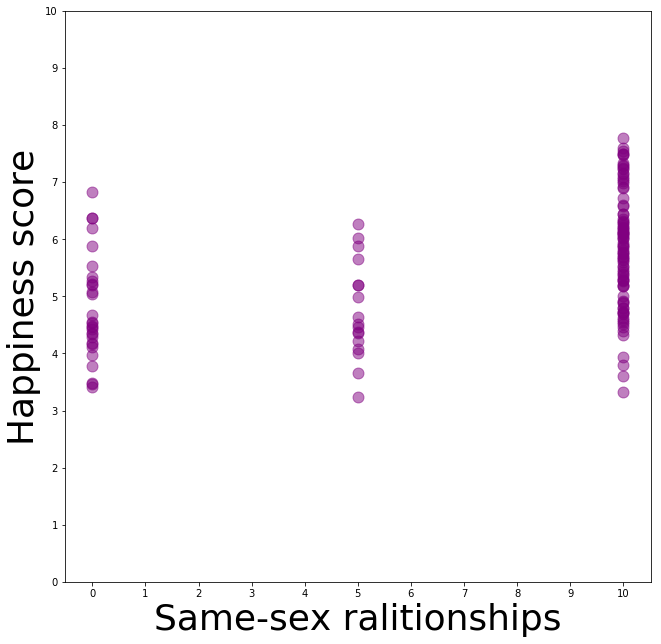

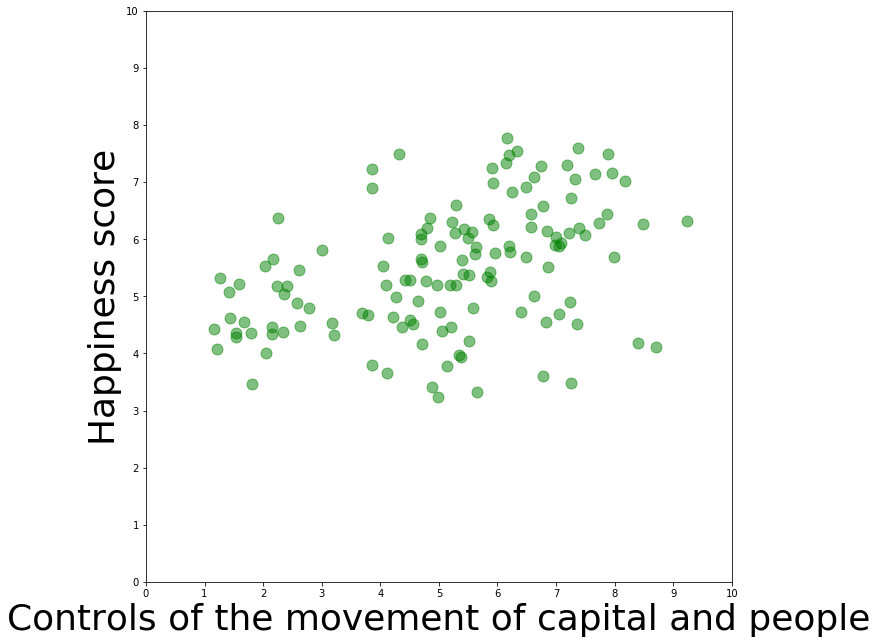

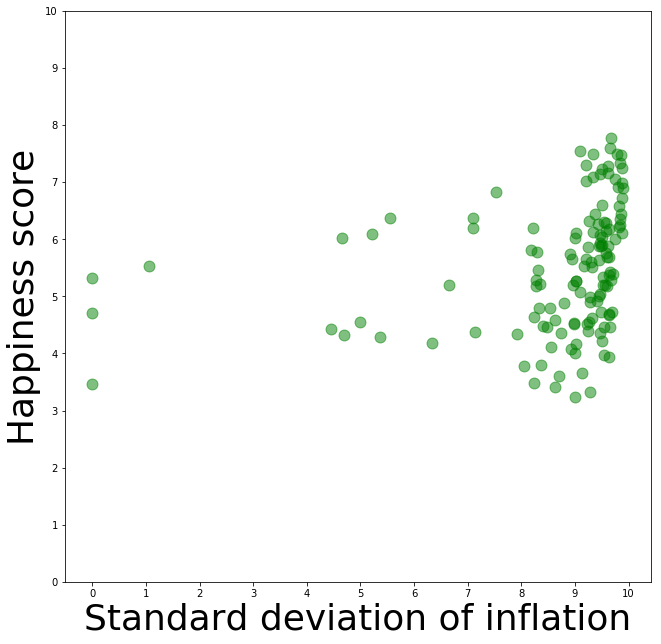

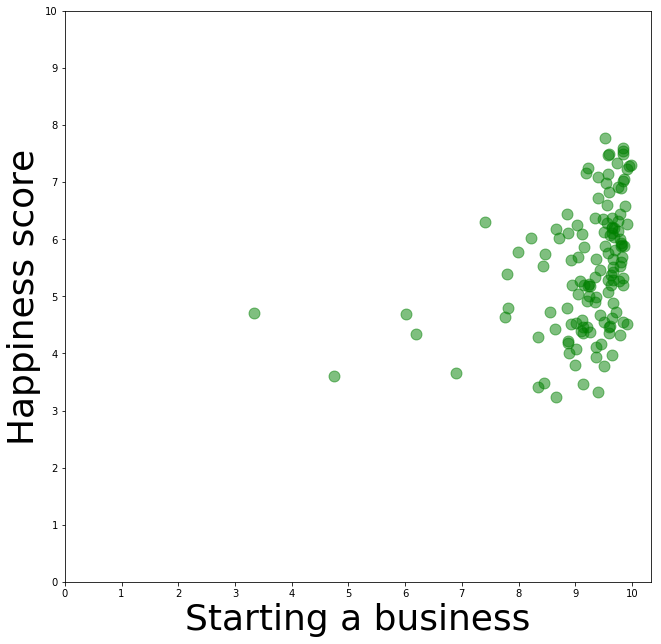

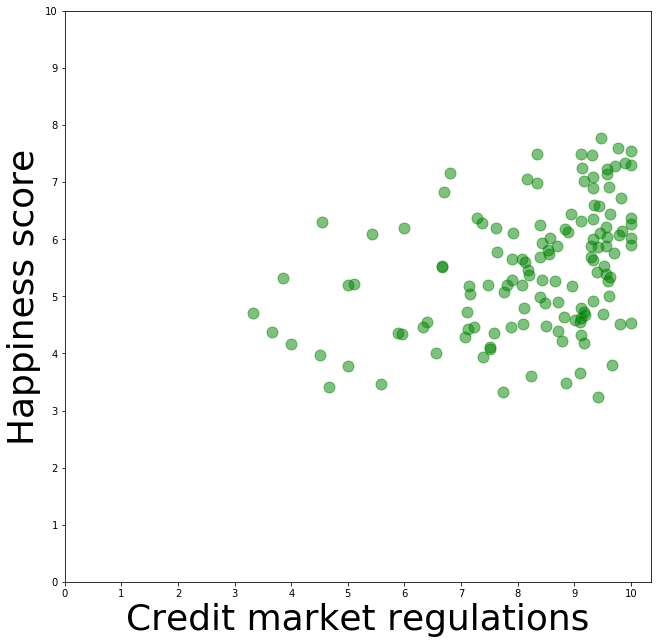

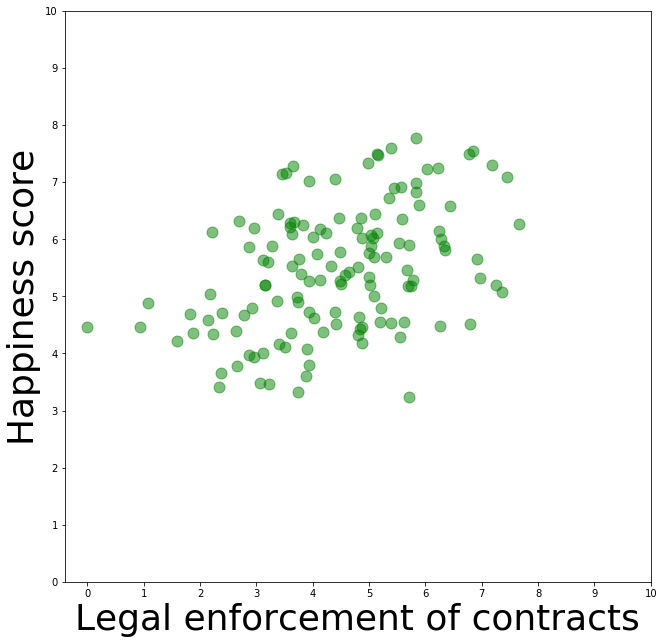

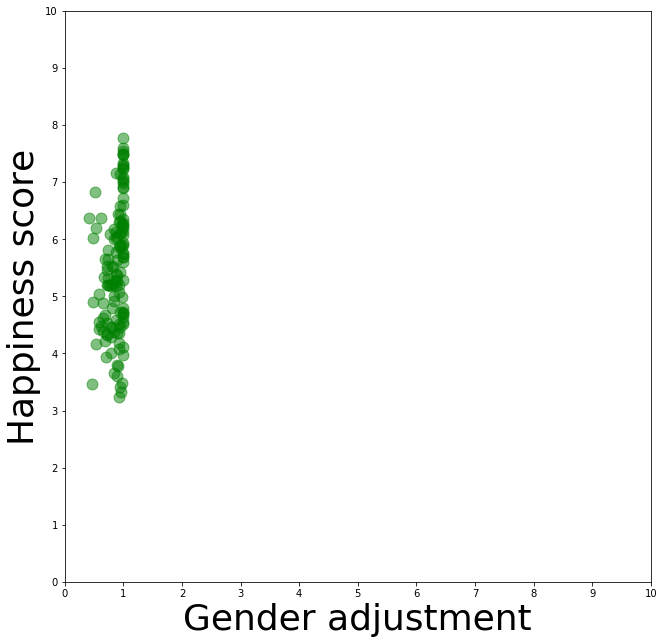

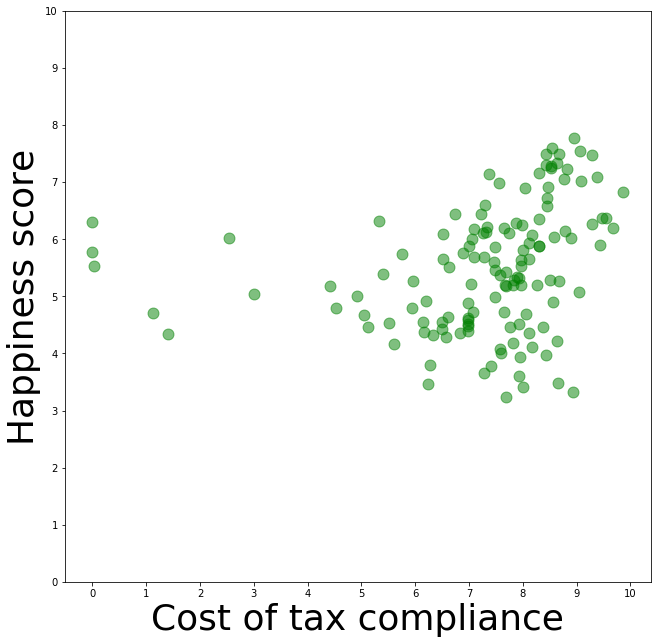

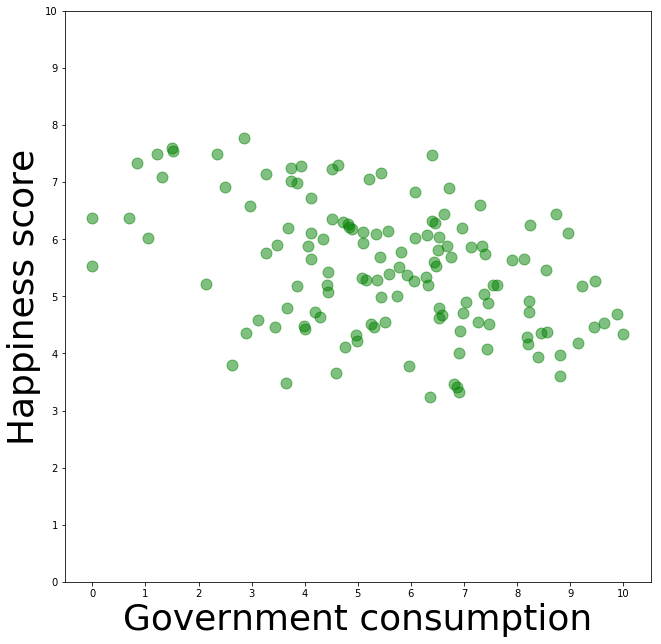

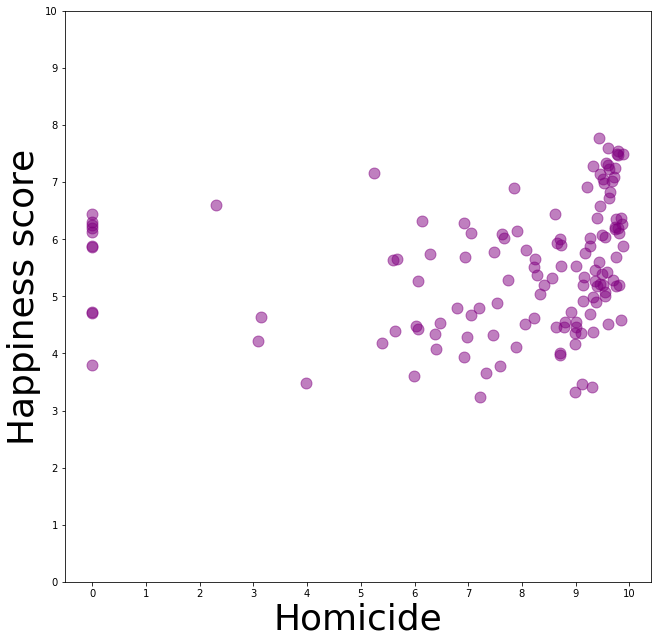

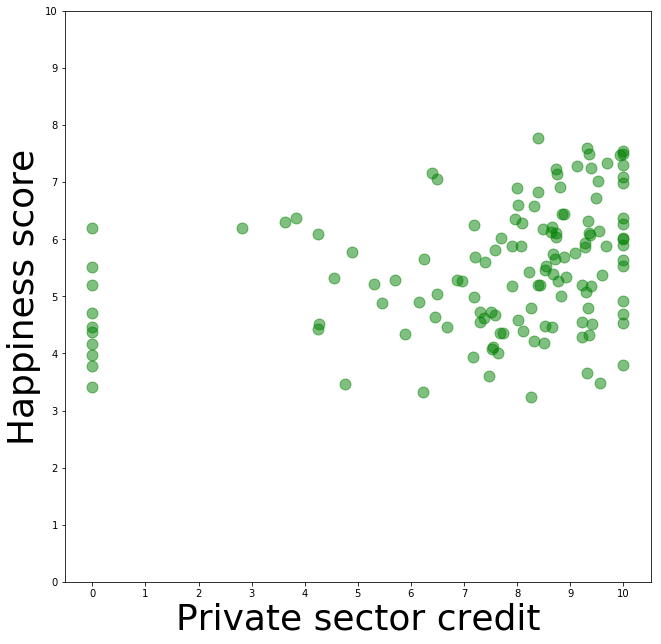

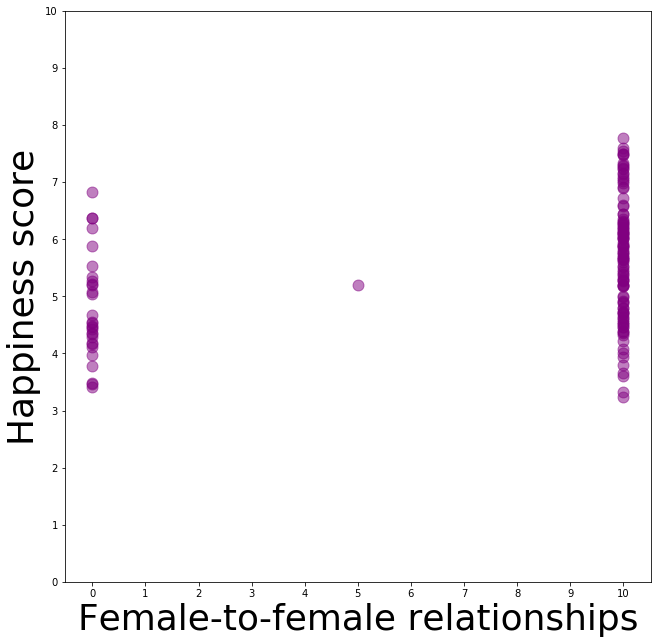

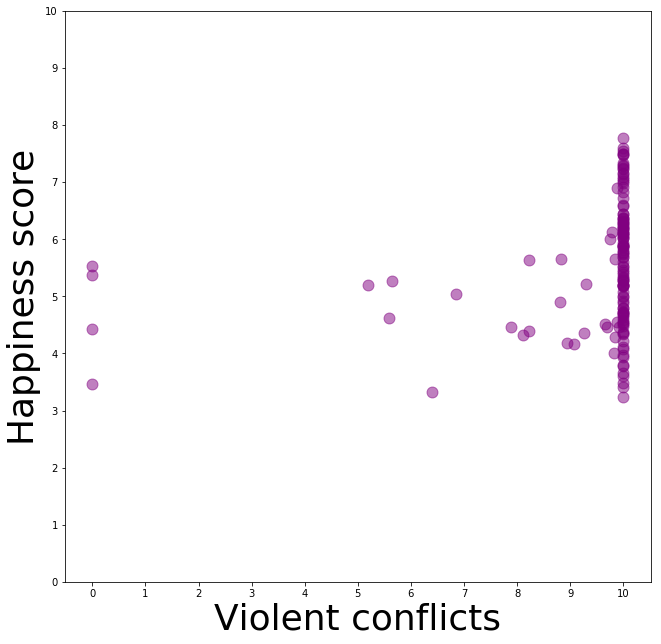

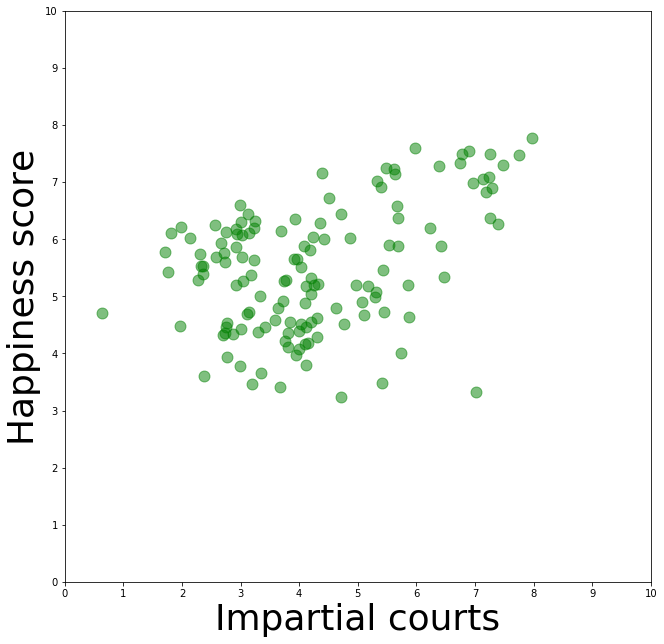

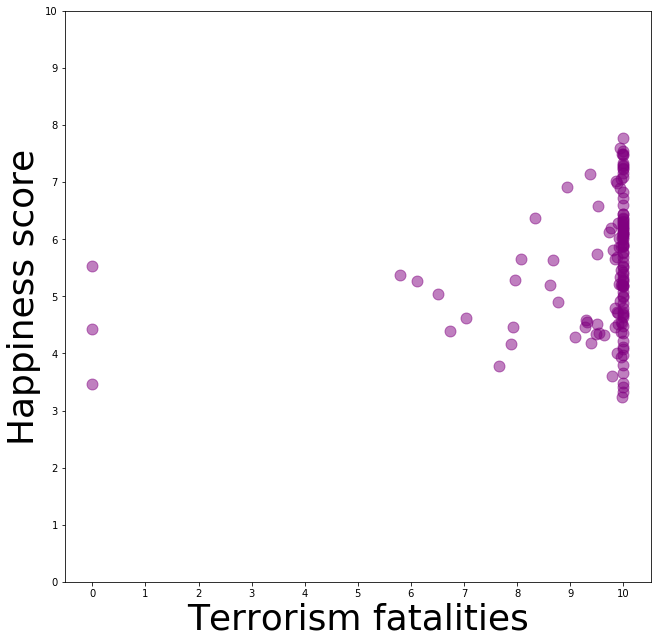

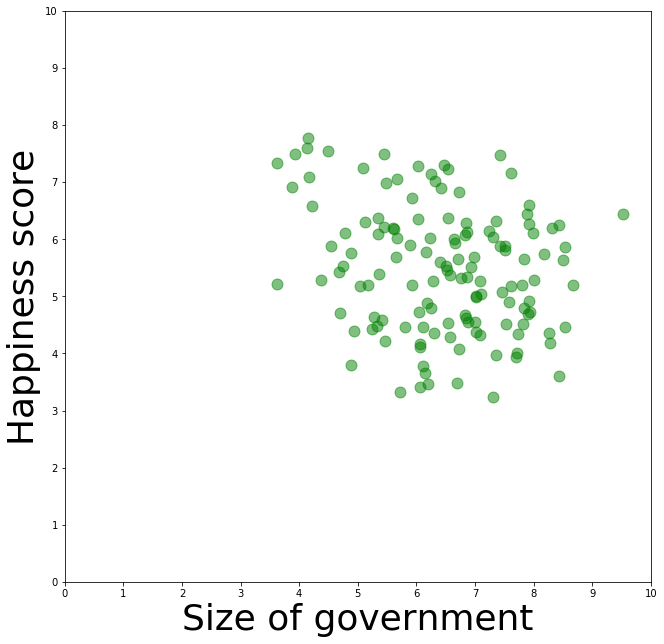

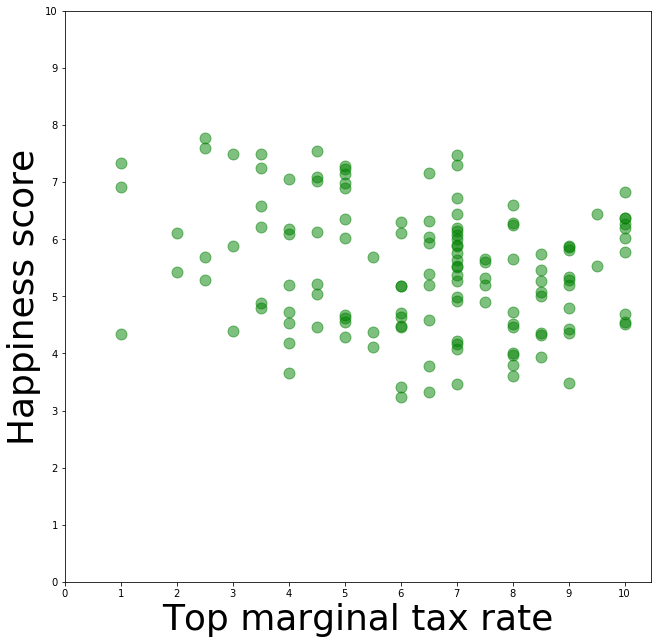

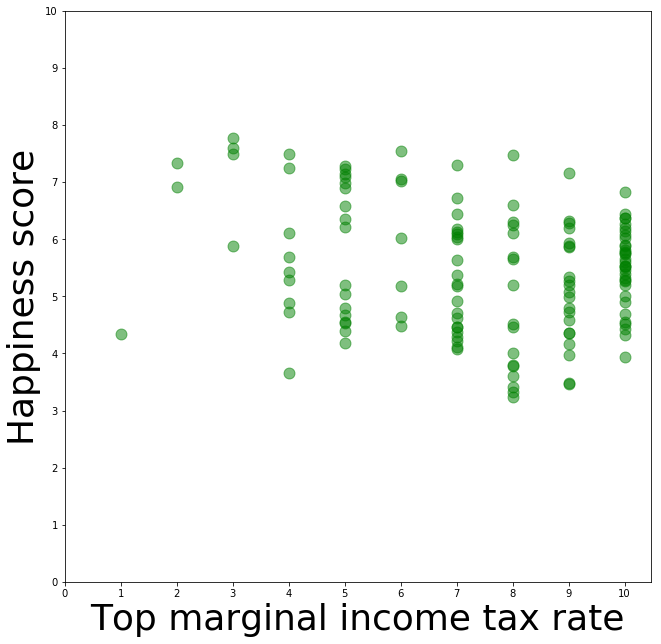

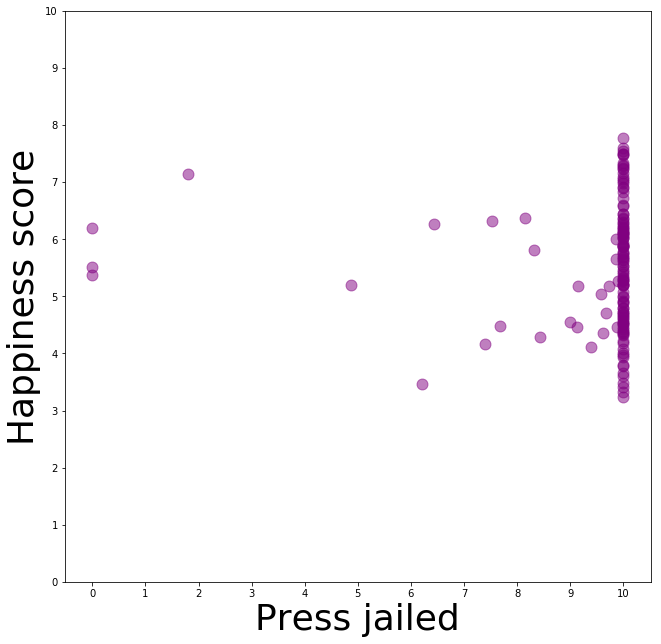

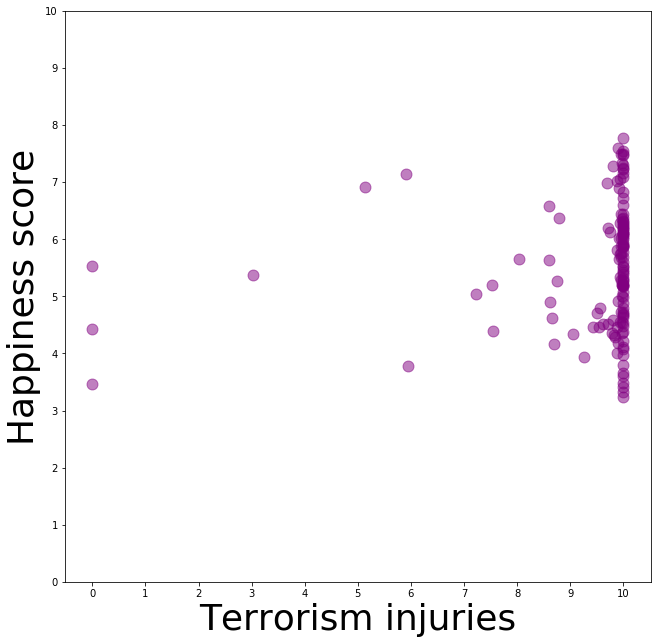

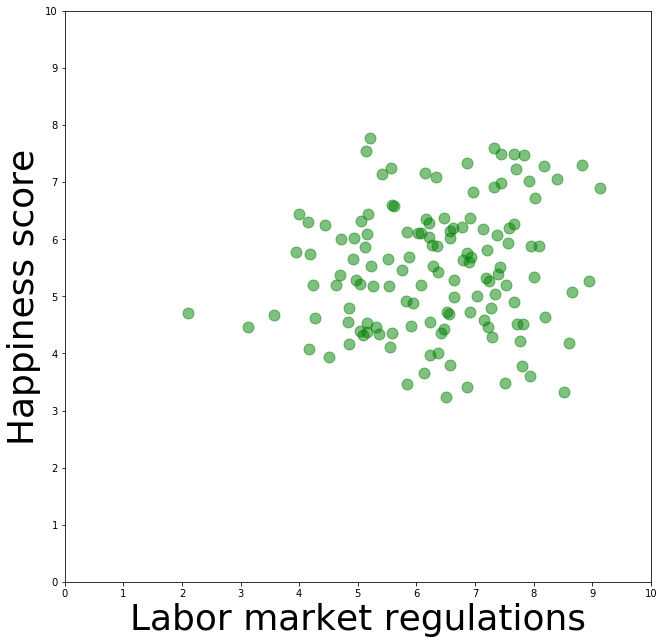

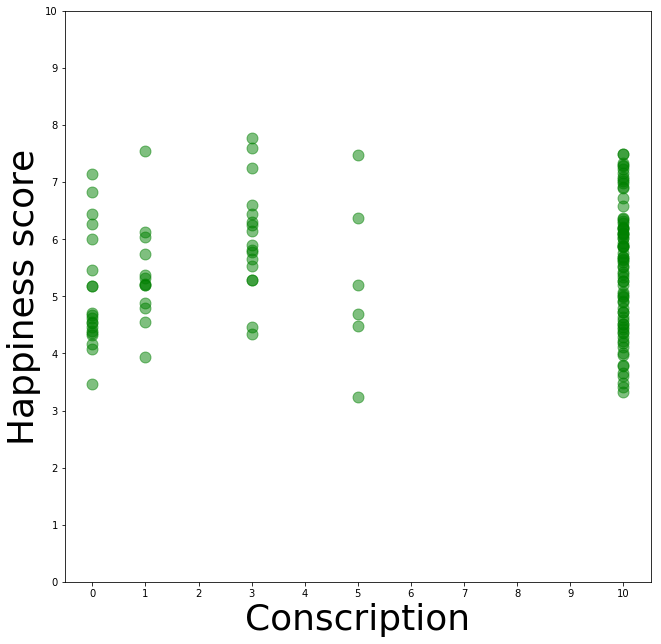

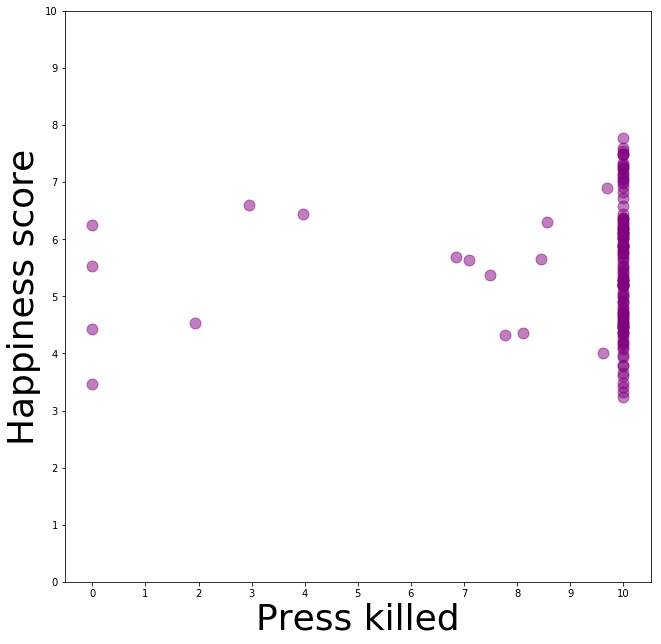

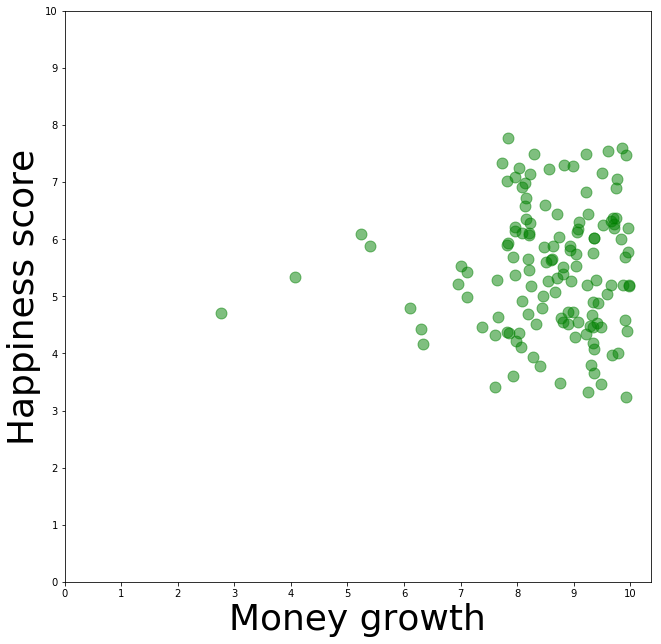

In [5]:
for index,row in rs.iterrows():
    if(index[0:2] == "pf"):
        color = "purple"
    if(index[0:2] == "ef"):
        color = "green"
    plt.scatter(
        x=df[index],
        y=df["Happiness score"],
        marker="o", 
        facecolors=color, 
        alpha=0.50,
        s=120
    )
    plt.xlabel(labels.loc[index]['name'], fontsize=36)
    plt.ylabel("Happiness score", fontsize=36)
    plt.yticks(
        np.arange(0,11,1)
    )
    plt.xticks(
        np.arange(0,11,1)
    )
    
    fig = plt.gcf()
    fig.set_size_inches(10.5, 10.5)
    fig.savefig('plots/' + index + '.png')
    plt.show()

In [6]:
top_cols = rs.head(5)
top_5_countries = df.sort_values(by=["Happiness score"],ascending=False).head(5)
bottom_5_countries = df.sort_values(by=["Happiness score"],ascending=False).tail(5)


In [7]:
bar_countries = pd.concat([top_5_countries,bottom_5_countries])
bar_countries

,pf_rol,pf_ss_homicide,pf_ss_disappearances_violent,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss,pf_movement,pf_expression_killed,pf_expression_jailed,...,ef_regulation_credit_private,ef_regulation_credit,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,Happiness score
Finland,8.639248,9.432892,10.000000,10.000000,10.000000,10.000000,9.810964,10.000000,10.0,10.000000,...,8.393517,9.464506,3.0,5.200685,7.777778,9.520282,8.957533,8.488582,7.717924,7.769
Denmark,8.687101,9.607727,10.000000,9.941806,9.895252,9.967412,9.858380,10.000000,10.0,10.000000,...,9.308722,9.769574,3.0,7.316828,7.111111,9.841582,8.542788,7.875363,8.320588,7.600
Norway,8.556488,9.794278,10.000000,10.000000,10.000000,10.000000,9.931426,10.000000,10.0,10.000000,...,10.000000,10.000000,1.0,5.134820,7.555556,9.846743,9.069626,8.065446,7.733422,7.554
Iceland,7.572815,9.879821,10.000000,10.000000,10.000000,10.000000,9.959940,10.000000,10.0,10.000000,...,10.000000,8.333333,10.0,7.671092,7.777778,9.590608,8.430694,8.024134,8.009520,7.494
Netherlands,8.524551,9.778655,10.000000,9.980427,9.964769,9.989039,9.922565,10.000000,10.0,10.000000,...,9.348361,9.116120,10.0,7.445073,9.111111,9.841722,8.666090,8.256771,8.272655,7.488
Botswana,5.641684,3.984712,10.000000,10.000000,10.000000,10.000000,7.161571,8.333333,10.0,10.000000,...,9.570258,8.856753,10.0,7.509680,6.222222,8.455853,8.654881,6.942897,7.769777,3.488
Syria,1.980355,9.118885,0.000000,0.000000,0.000000,0.000000,4.984073,0.000000,0.0,6.201938,...,4.756256,5.585419,0.0,5.846806,0.888889,9.145365,6.233666,4.901109,5.444445,3.462
Malawi,4.922643,9.306716,10.000000,10.000000,10.000000,9.500000,8.768905,8.333333,10.0,10.000000,...,0.000000,4.666667,10.0,6.860814,2.666667,8.346889,8.010345,5.751542,5.759674,3.410
Rwanda,5.282070,8.992223,6.391863,10.000000,10.000000,8.278373,8.534643,6.666667,10.0,10.000000,...,6.219284,7.739761,10.0,8.519242,7.555556,9.403435,8.940719,8.230928,8.163310,3.334
Tanzania,4.244131,7.219003,10.000000,9.982005,9.992802,9.494962,7.349099,8.333333,10.0,10.000000,...,8.265728,9.421909,5.0,6.512974,1.777778,8.652896,7.679669,5.692047,7.208977,3.231


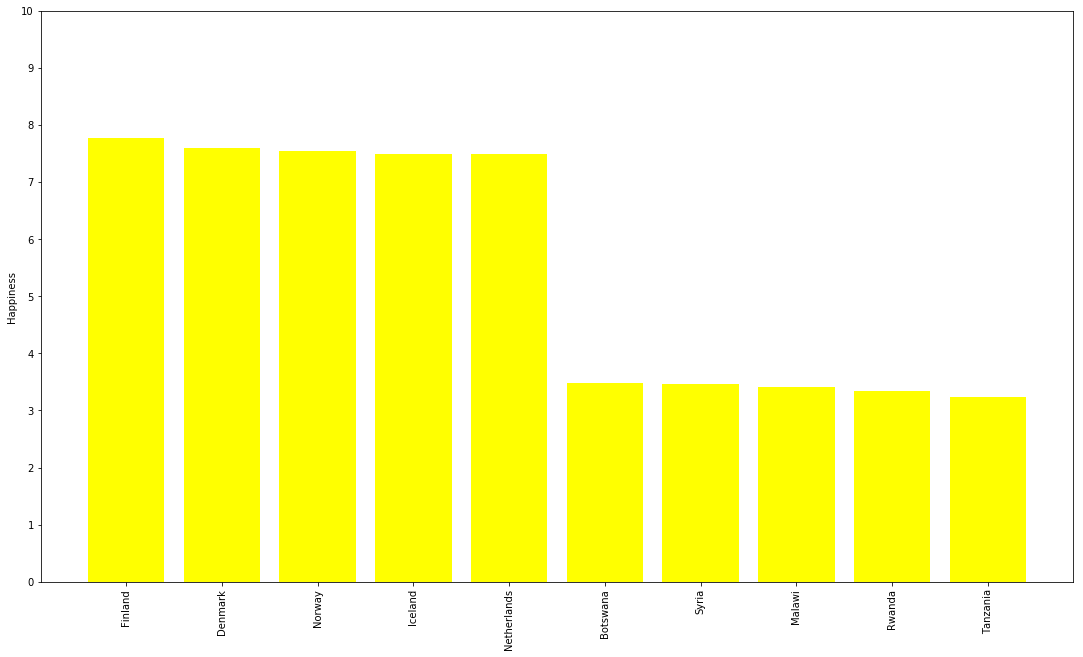

In [8]:
countries_list = list(bar_countries.index.values)
color="yellow"
plt.bar(countries_list,bar_countries["Happiness score"],color=color)
plt.xticks(
    countries_list, 
    countries_list, 
    rotation="vertical"
)
plt.yticks(
    np.arange(0,11,1)
)
plt.ylabel("Happiness")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('plots/bar_happiness.png')
plt.show()

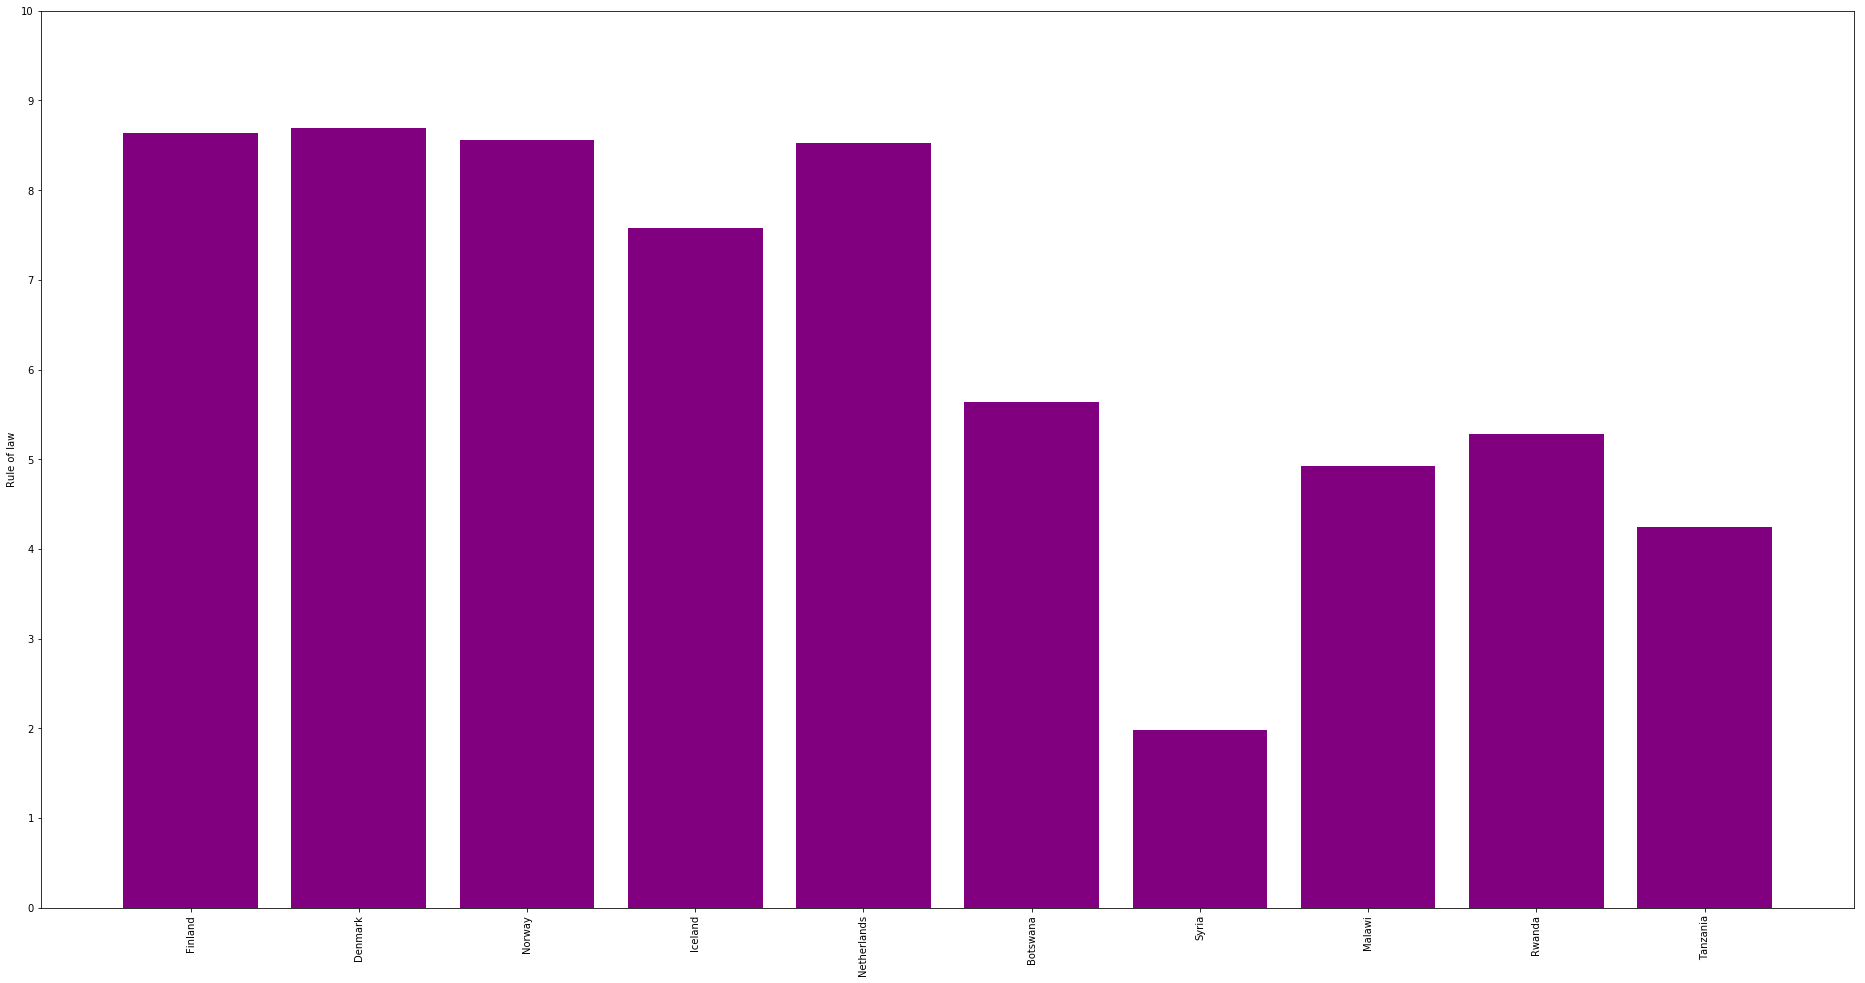

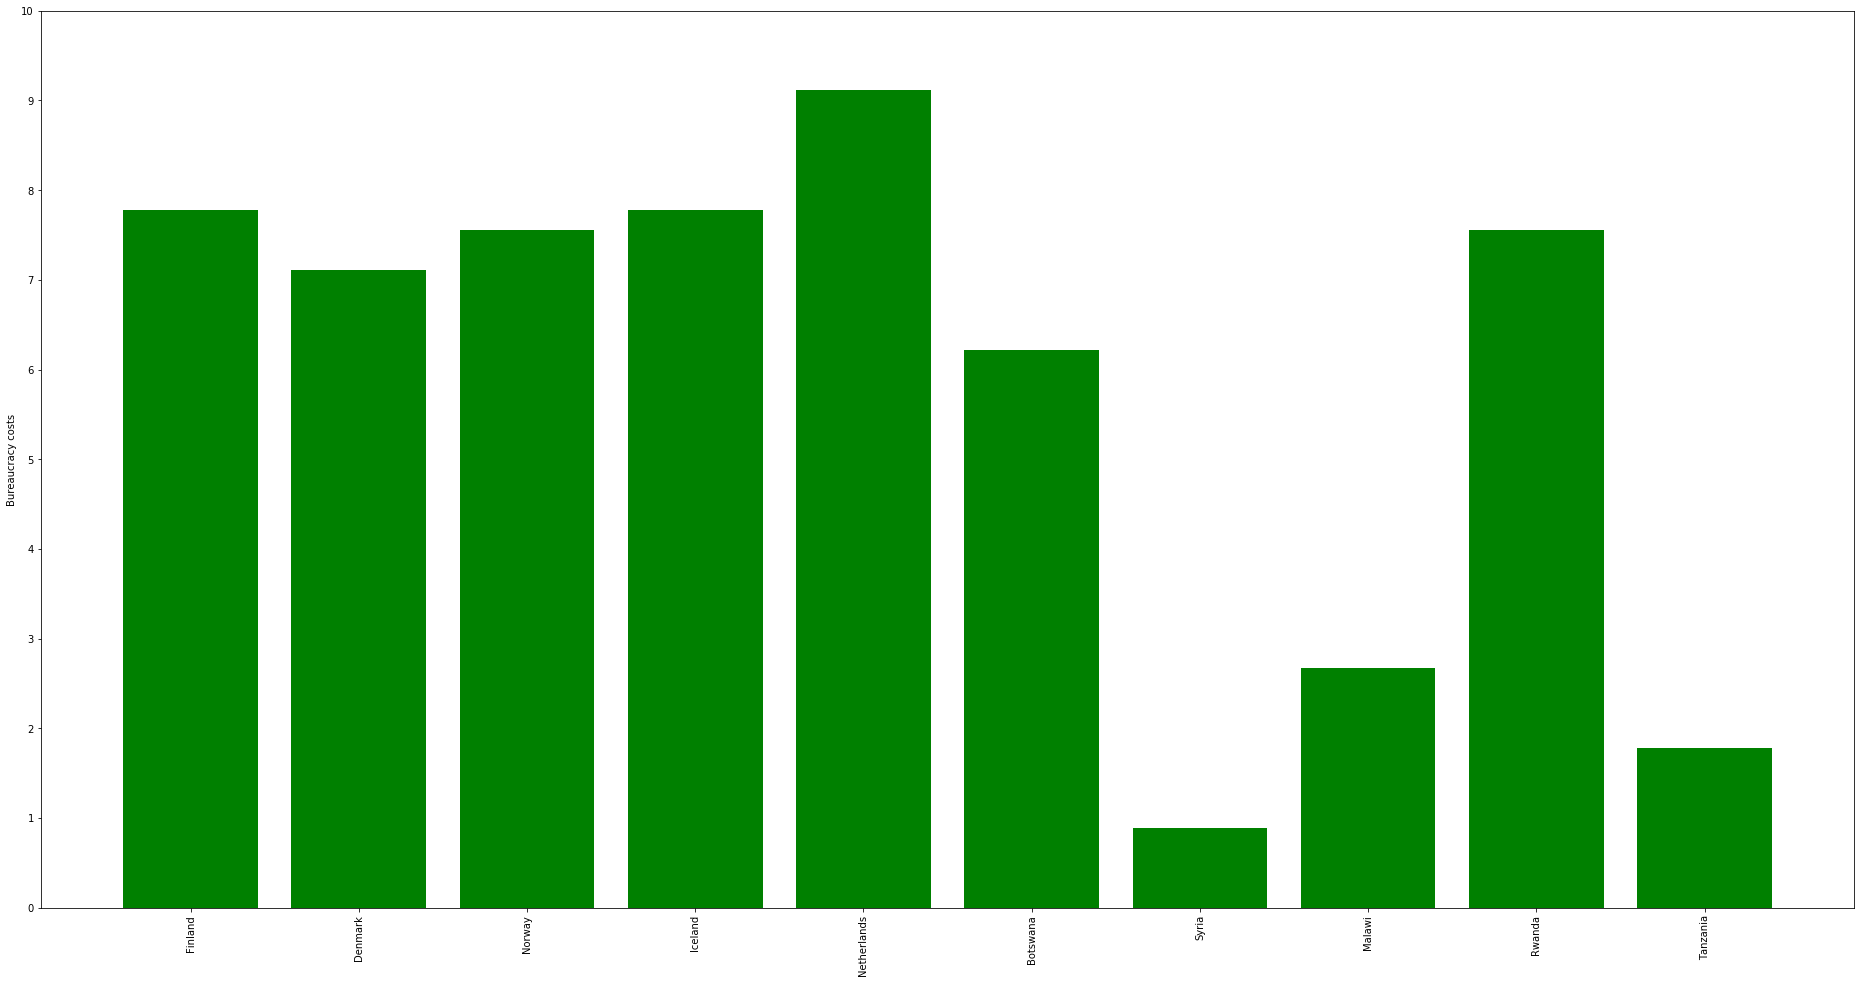

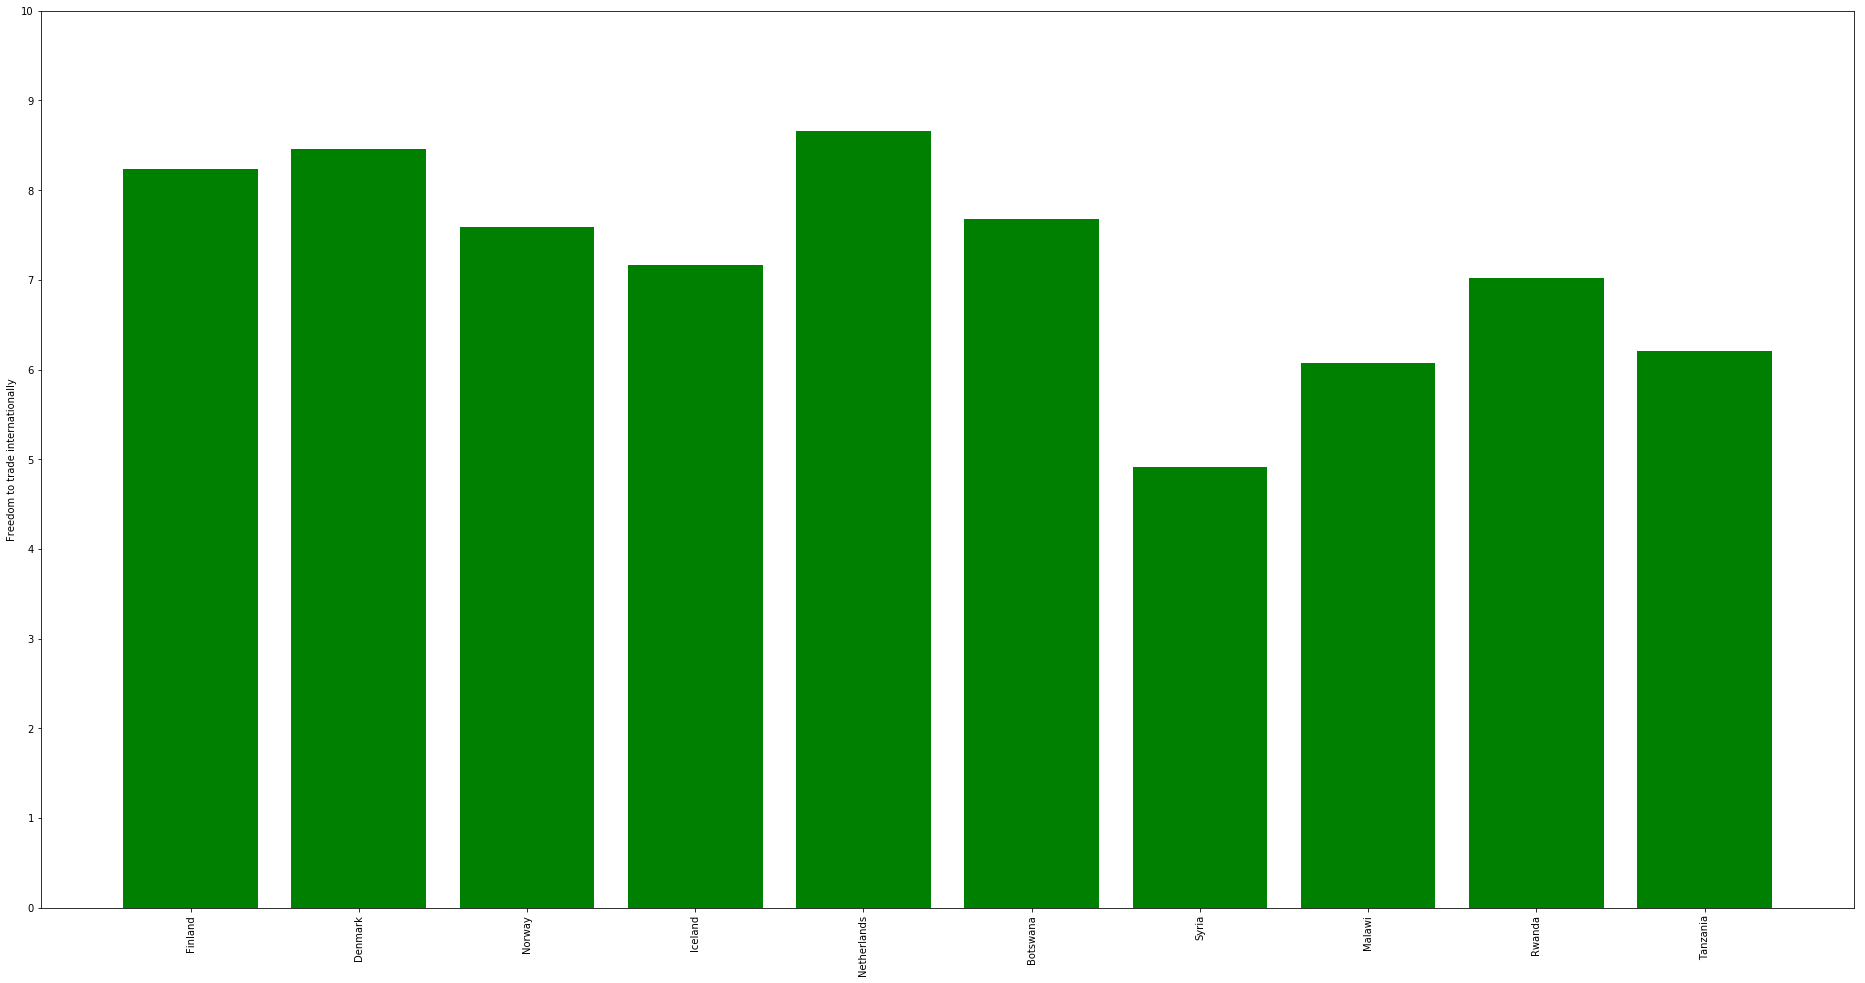

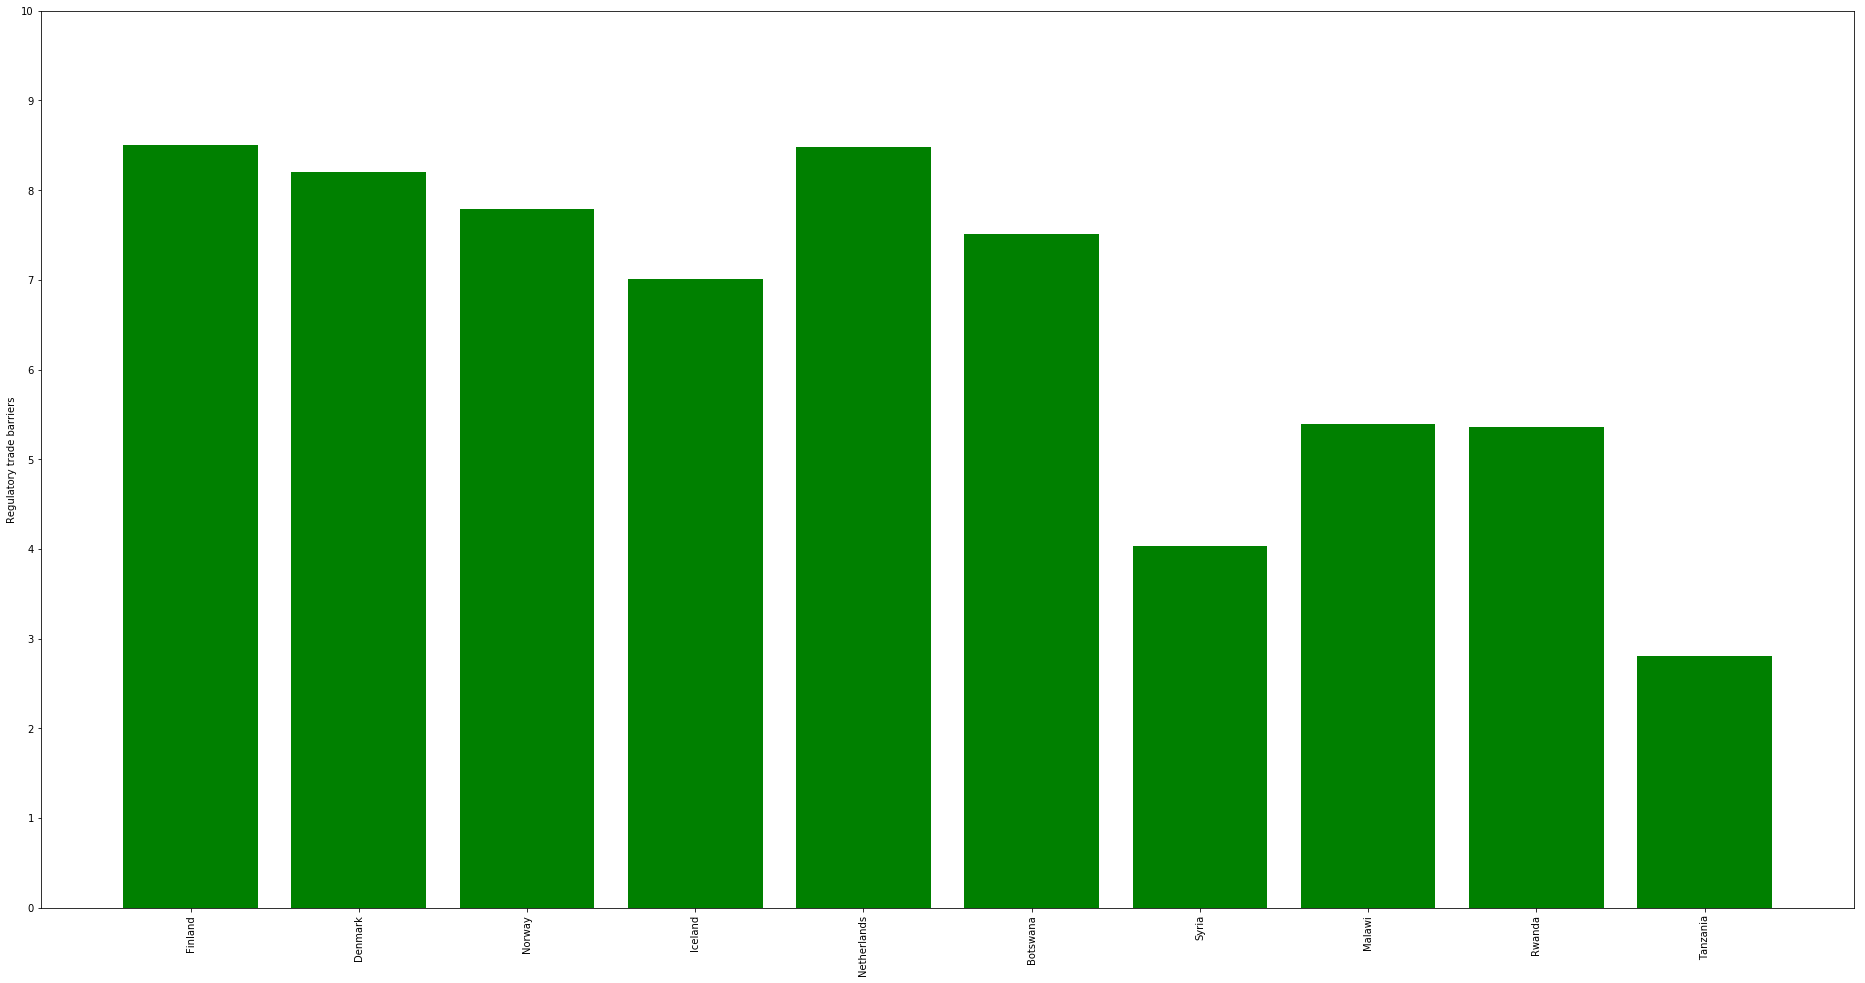

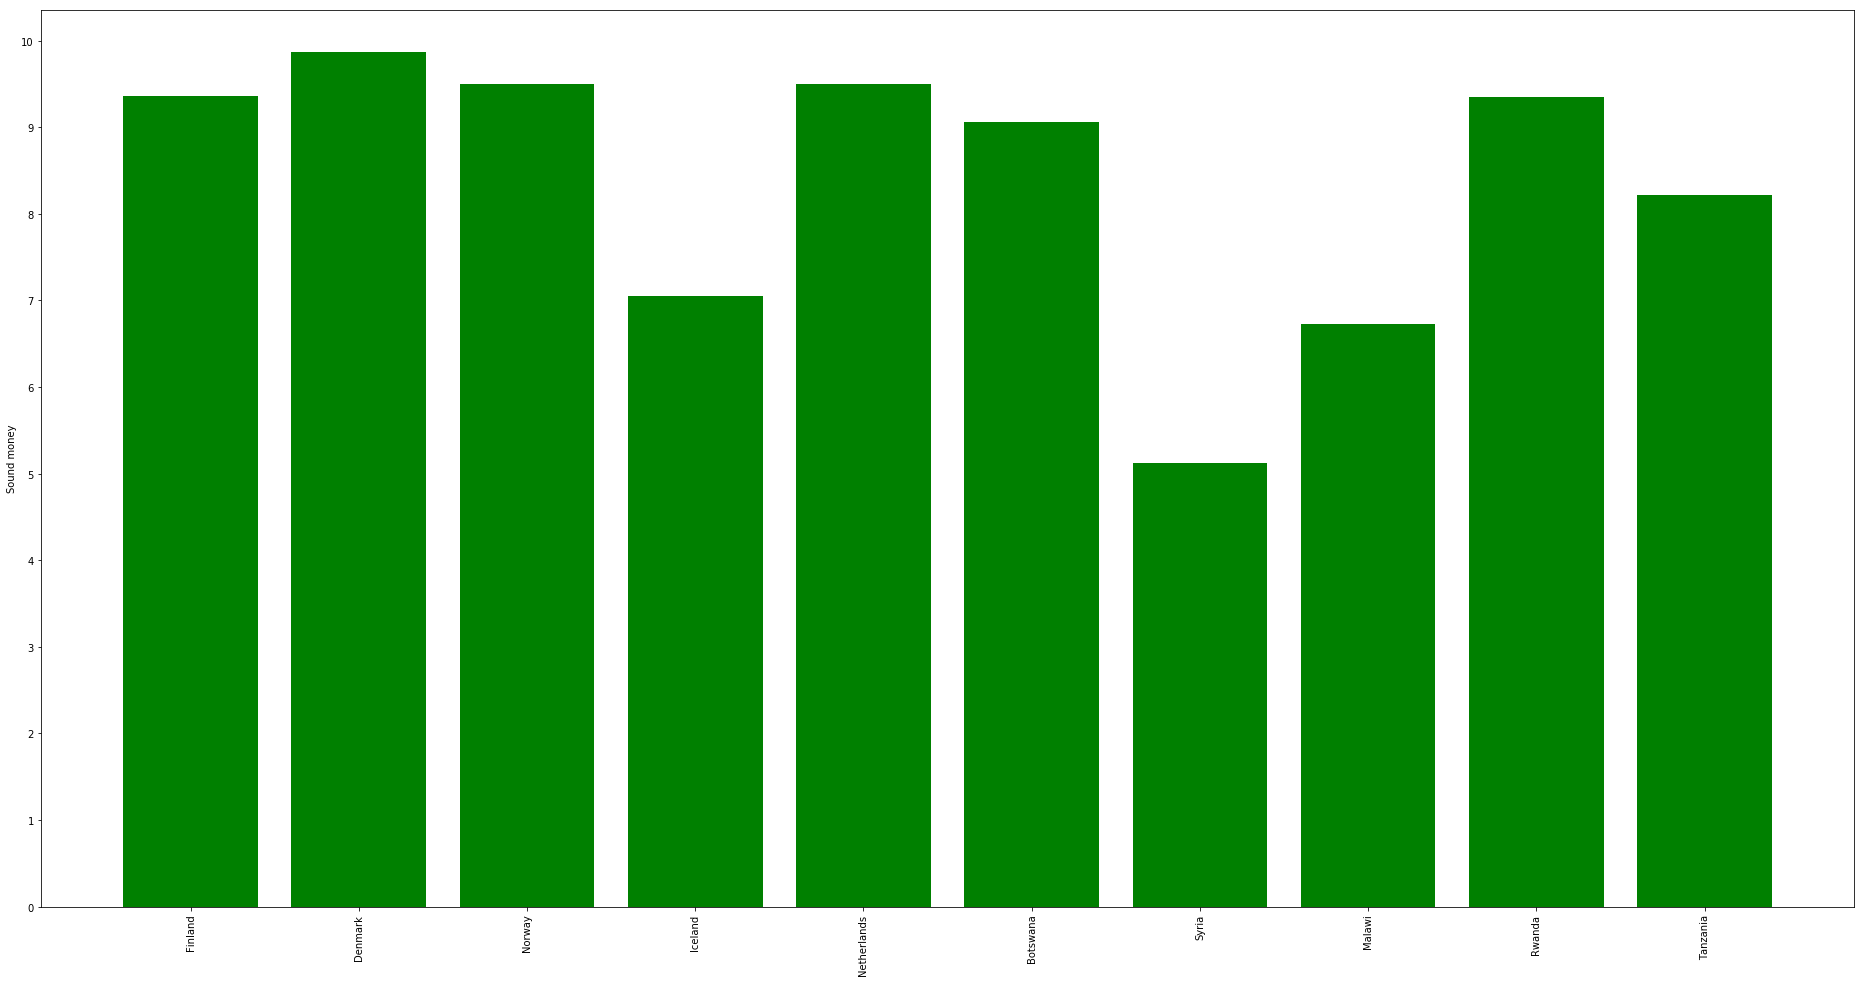

In [9]:
for index,row in top_cols.iterrows():
    if(index[0:2] == "pf"):
        color = "purple"
    if(index[0:2] == "ef"):
        color = "green"
    plt.bar(countries_list,bar_countries[index],color=color)
    plt.xticks(
        countries_list, 
        countries_list, 
        rotation="vertical"
    )
    plt.yticks(
        np.arange(0,11,1)
    )
    plt.ylabel(labels.loc[index]['name'])
    fig = plt.gcf()
    fig.set_size_inches(32.5, 16.5)
    fig.savefig('plots/bar_'+index+'.png')
    plt.show()
    


In [10]:
kt = pd.DataFrame(columns=["column","pvalue","correlation","column label"])
a = []
b = []
c = []
d = []
for index,col in pvals.iterrows():
    x3 = stats.kendalltau(df[index], df['Happiness score'])
    a.append(index)
    d.append(labels.loc[index]['name'])
    b.append(x3.pvalue)
    c.append(x3.correlation)

kt["column"] = a
kt["pvalue"] = b
kt["correlation"] = c
kt["column label"] = d
kt = kt.sort_values(by=['pvalue'])
kt = kt.set_index("column")
kt

,pvalue,correlation,column label
column,,,
pf_rol,8.406067e-18,0.501431,Rule of law
ef_regulation_business_bureaucracy,2.742693e-15,0.465904,Bureaucracy costs
ef_trade,9.085411e-15,0.452275,Freedom to trade internationally
ef_trade_regulatory,1.660578e-14,0.447786,Regulatory trade barriers
ef_legal,4.126381e-13,0.423096,Legal system and property rights
ef_legal_military,1.443664e-12,0.431028,Military interference in rule of law and politics
ef_money,3.822309e-12,0.405140,Sound money
pf_ss,4.319831e-12,0.404153,Security and safety
pf_expression,8.472804e-12,0.398854,Freedom of expression
